## Assignment-09

### Data Analytics-II

1. Implement logistic regression using Python/R to
perform classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision,
Recall on the given dataset.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df= pd.read_csv('Social_Network_Ads.csv')

#### Social_Network_Ads

    1. Age: Age of the user.

    2. EstimatedSalary: User's estimated salary.

    3. Purchased: Whether the user purchased a product or not (usually 0 or 1).

    4. Gender: Gender of the user (e.g., Male, Female).

    5. User Id: Id of the user on the social media

In [25]:
df.shape

(400, 5)

In [26]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [27]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
# Drop unnecessary columns
df.drop(['User ID'],axis=1,inplace=True)

In [29]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [30]:
#Getting the number of purchases done
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [31]:
# Distribution of people by gender
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [32]:
#Preprocessing the data
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### No missing data values

<Axes: ylabel='Age'>

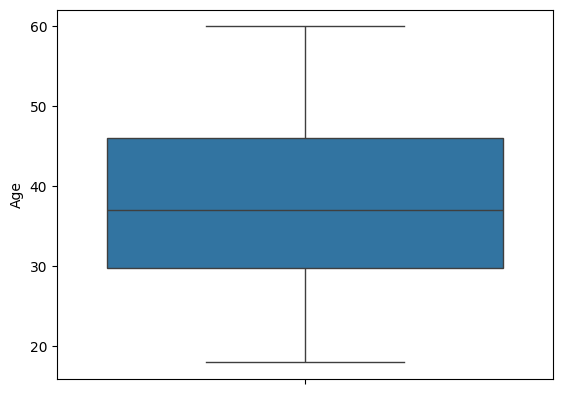

In [33]:
sns.boxplot(data=df["Age"])

#### No outliers in the Age

/tmp/ipykernel_38570/1780666602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Gender",y="Purchased",palette="Greens")


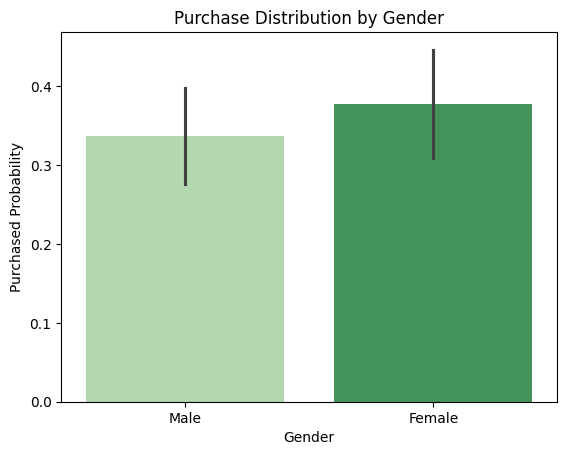

In [34]:
#g = sns.catplot(x="Gender", y="Purchased", data=df, kind="bar", height=4,palette = "Greens",hue="Gender")
sns.barplot(data = df, x = "Gender",y="Purchased",palette="Greens")
plt.title("Purchase Distribution by Gender")

# Set the y-axis label
plt.ylabel("Purchased Probability")

# Display the plot
plt.show()

In [35]:
#Applying the normalization on data columns using min_max scaling
def min_max_normalize( feature ):
    df[ feature ] = ( df[feature] - df[feature].min() ) / ( df[feature].max() - df[feature].min() ) 

min_max_normalize("EstimatedSalary")
min_max_normalize("Age")

### Training the model: Logistics regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Perform label encoding on the 'Gender' column
df['Gender'] = encoder.fit_transform(df['Gender'])

#Get Input Variable into X and Outcome variable into Y
X = np.asarray(df.drop(["Purchased"], axis=1)) #All variables as input except Purchased
y = np.asarray(df["Purchased"])


# Creating a logistic-regression model
model = LogisticRegression()

#Split the data in train-test in the ratio 70:30 resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Train the model
model.fit(X_train, y_train)

#Perform predictions
y_pred = model.predict(X_test)

#Check training and testing score
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 83.21428571428572
Testing accuracy: 77.5


### Model Evaluation: Precision, Recall, F1-score, Accuracy,Error rate, support

In [37]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives, False Positives, False Negatives, True Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the confusion matrix
print("Confusion Matrix:\n", cm)
print("\n")

# Print TP, FP, TN, FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\n")

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)

# Calculate Error Rate
error_rate = 1 - accuracy

# Calculate Support (number of actual occurrences of each class)
support = cm.sum(axis=1)

# Display the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy:", accuracy * 100)
print("Error Rate:", error_rate * 100)
print("Support:", support) #sum of rows i.e. 77+8, 9+26


Confusion Matrix:
 [[71  3]
 [24 22]]


True Positives (TP): 22
True Negatives (TN): 71
False Positives (FP): 3
False Negatives (FN): 24


Precision: 0.88
Recall: 0.4782608695652174
F1-score: 0.619718309859155
Accuracy: 77.5
Error Rate: 22.499999999999996
Support: [74 46]


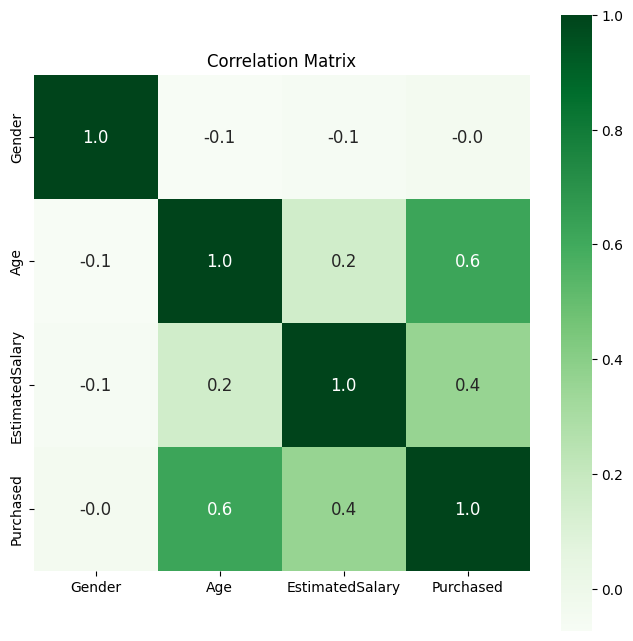

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='Greens', cbar=True, square=True, annot_kws={'size': 12})

# Show the plot
plt.title("Correlation Matrix")
plt.show()
